<a href="https://colab.research.google.com/github/LuisDLCP/ProyectoFinal_MineriaDatos/blob/main/4)Create_model_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [164]:
root_path="./drive/MyDrive/Master_Program_CC/AprendizajeAutomatico/Proyecto_final/"
dataset_path = root_path + "DataSet/"
!ls {dataset_path}

'1)Data_original'      dataset1.csv    DATASET_BALANCEADO_noind.csv
'2)Data_etiquetada'    dataset1.xlsx   DATASET_BALANCEADO_noind.xlsx
'3)Data_filtrada'      dataset2.csv    modelo_proyectofinal.pkl
'4)Data_grayscale'     dataset2.xlsx   SUBMUESTREO
'5)Data_binary'        dataset3.csv    SUBMUESTREO_DATAFINAL
 data4normalize.xlsx   dataset3.xlsx


## 1) Import the dataset

In [165]:
import pandas as pd
import numpy as np

In [166]:
df = pd.read_excel(dataset_path+"dataset3.xlsx")
df.head()


,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
0,con_mask1.png,0.101641,1301.0,0.302175,0.052199,451.0,0.222428,0.078472,339.0,0.268913,0.130093,281.0,0.336405,0.127915,373.0,0.333995,1
1,con_mask2.png,0.470391,6021.0,0.499123,0.272106,2351.0,0.445044,0.544213,2351.0,0.498041,0.745833,1611.0,0.435392,0.364198,1062.0,0.481204,1
2,con_mask3.png,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236,1
3,con_mask3.png,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236,1
4,con_mask4.png,0.083203,1065.0,0.276189,0.085417,738.0,0.279501,0.167130,722.0,0.373092,0.333796,721.0,0.471568,0.243484,710.0,0.429185,1


In [167]:
df.iloc[126]

ID           con_mask87.png
Promedio1          0.125625
Suma1                  1608
STD1               0.331426
Promedio2          0.130903
Suma2                  1131
STD2               0.337294
Promedio3          0.243287
Suma3                  1051
STD3               0.429067
Promedio4          0.178704
Suma4                   386
STD4               0.383104
Promedio5          0.122428
Suma5                   357
STD5               0.327779
Clase                     1
Name: 126, dtype: object

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         484 non-null    object 
 1   Promedio1  484 non-null    float64
 2   Suma1      484 non-null    float64
 3   STD1       484 non-null    float64
 4   Promedio2  484 non-null    float64
 5   Suma2      484 non-null    float64
 6   STD2       484 non-null    float64
 7   Promedio3  484 non-null    float64
 8   Suma3      484 non-null    float64
 9   STD3       484 non-null    float64
 10  Promedio4  484 non-null    float64
 11  Suma4      484 non-null    float64
 12  STD4       484 non-null    float64
 13  Promedio5  484 non-null    float64
 14  Suma5      484 non-null    float64
 15  STD5       484 non-null    float64
 16  Clase      484 non-null    int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 64.4+ KB


In [169]:
# Making sure data is balanced 
df.groupby("Clase").count()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5
Clase,,,,,,,,,,,,,,,,
0,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
1,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242


## 2) Getting X and Y

In [170]:
# Getting X and Y 
X = df.drop(['ID', 'Clase'],axis=1) # select all columns except 'id' and 'clase'
X.head()

,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5
0,0.101641,1301.0,0.302175,0.052199,451.0,0.222428,0.078472,339.0,0.268913,0.130093,281.0,0.336405,0.127915,373.0,0.333995
1,0.470391,6021.0,0.499123,0.272106,2351.0,0.445044,0.544213,2351.0,0.498041,0.745833,1611.0,0.435392,0.364198,1062.0,0.481204
2,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236
3,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236
4,0.083203,1065.0,0.276189,0.085417,738.0,0.279501,0.167130,722.0,0.373092,0.333796,721.0,0.471568,0.243484,710.0,0.429185


In [171]:
y = df['Clase']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Clase, dtype: int64

## 3) Train - test split 

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) 

In [174]:
y_train.shape

(363,)

In [175]:
X_train.shape

(363, 15)

In [176]:
# Verify spplited data is balanced 
y_train.groupby(y_train).count()

Clase
0    189
1    174
Name: Clase, dtype: int64

In [177]:
# Save X_train, to then normalize new data
X_train.to_excel(dataset_path+"data4normalize.xlsx")


## 4) Normalize data

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [180]:
# Now apply the transformations to the data:
X_train2 = scaler.transform(X_train) # 2D array
X_test2 = scaler.transform(X_test) # 2D array

## 5) Training the model

In [181]:
from sklearn.neural_network import MLPClassifier

In [182]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1500) # 3 hidden layers, with 10 neurons each 

In [183]:
mlp.fit(X_train2,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1500)

## 6) Predictions and Evaluation

In [184]:
from sklearn.metrics import classification_report

In [185]:
y_test_predicted = mlp.predict(X_test2)

In [186]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.98      0.91      0.95        68

    accuracy                           0.94       121
   macro avg       0.94      0.95      0.94       121
weighted avg       0.95      0.94      0.94       121



In [187]:
from sklearn.metrics import confusion_matrix

In [188]:
matriz_confusion = confusion_matrix(y_test,y_test_predicted)
matriz_confusion

array([[52,  1],
       [ 6, 62]])

Text(0.5, 1.0, 'Matriz de confusión')

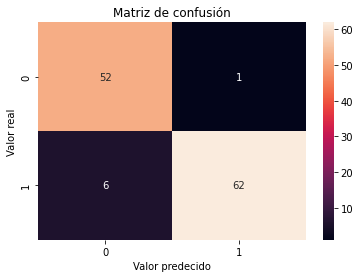

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matriz_confusion, annot=True)
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')

## 7) Check wrong values

In [190]:
y_test_predicted

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [191]:
y_test

328    0
45     1
218    1
192    1
393    0
      ..
458    0
418    0
101    1
34     1
231    1
Name: Clase, Length: 121, dtype: int64

In [192]:
y_test["predecido"]=y_test_predicted

In [193]:
y_test

328                                                          0
45                                                           1
218                                                          1
192                                                          1
393                                                          0
                                   ...                        
418                                                          0
101                                                          1
34                                                           1
231                                                          1
predecido    [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, ...
Name: Clase, Length: 122, dtype: object

In [194]:
y_test2 = y_test.drop("predecido")
y_test3 = y_test2.to_frame()
y_test3

,Clase
328,0
45,1
218,1
192,1
393,0
...,...
458,0
418,0
101,1
34,1


In [195]:
y_test3["Clase_predecido"]=y_test_predicted
y_test3 = y_test3.rename({"Clase":"Clase_real"}, axis=1)
y_test3

,Clase_real,Clase_predecido
328,0,0
45,1,1
218,1,1
192,1,0
393,0,0
...,...,...
458,0,0
418,0,0
101,1,1
34,1,1


In [211]:
y_test4 = y_test3[y_test3["Clase_predecido"]==0]
y_test4

,Clase_real,Clase_predecido
328,0,0
192,1,0
393,0,0
226,1,0
402,0,0
82,1,0
441,0,0
265,0,0
366,0,0
454,0,0


In [212]:
y_test4[y_test4["Clase_real"]==1]

,Clase_real,Clase_predecido
192,1,0
226,1,0
82,1,0
87,1,0
199,1,0
126,1,0


In [198]:
0.06*66

3.96

In [199]:
0.04*55

2.2

In [200]:
len(y_test4)

53

In [214]:
df.iloc[[192,226,82,87, 199,126]]

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
192,con_mask130.png,0.101953,1305.0,0.302587,0.250347,2163.0,0.433213,0.245833,1062.0,0.430580,0.362963,784.0,0.480854,0.514060,1499.0,0.499802,1
226,con_mask153.png,0.028750,368.0,0.167103,0.043403,375.0,0.203762,0.044213,191.0,0.205568,0.038889,84.0,0.193330,0.046639,136.0,0.210865,1
82,con_mask55.png,0.007656,98.0,0.087164,0.002083,18.0,0.045596,0.002315,10.0,0.048057,0.004630,10.0,0.067884,0.006173,18.0,0.078325,1
87,con_mask59.png,0.008594,110.0,0.092303,0.007292,63.0,0.085079,0.014583,63.0,0.119878,0.016667,36.0,0.128019,0.011660,34.0,0.107349,1
199,con_mask136.png,0.130547,1671.0,0.336904,0.130787,1130.0,0.337167,0.243750,1053.0,0.429344,0.189352,409.0,0.391788,0.112483,328.0,0.315960,1
126,con_mask87.png,0.125625,1608.0,0.331426,0.130903,1131.0,0.337294,0.243287,1051.0,0.429067,0.178704,386.0,0.383104,0.122428,357.0,0.327779,1


## 7) Test with new data

In [202]:
# This data is generated with the notebook '5)web_dataset_v2.ipynb'
new_data = np.array([[-0.42492764, -0.42492764, -0.05380232, -0.57983771, -0.57983771, -0.21356047,
  -0.36665937, -0.36665937,  0.28519728, -0.8771764,  -0.8771764,  -1.43805226,
  -0.95811771, -0.95811771, -1.51807936]])
mlp.predict(new_data)

array([0])